In [2]:
import pandas as pd
import numpy as np

# Modelling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib widget

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

import os
import csv

os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz\\bin\\'

directory = os.getcwd()

Data: 1
Accuracy: 0.6882317231809904
Precision: 0.6661864581189545
Recall: 0.6213051823416507
F1-Score: 0.6429635514946866
Data: 2
Accuracy: 0.6878848321914838
Precision: 0.6714073445128422
Recall: 0.6066359800537016
F1-Score: 0.6373803526448363
Data: 3
Accuracy: 0.6913537420865493
Precision: 0.6605409869915342
Recall: 0.6255377395385217
F1-Score: 0.6425630209902581
Data: 4


C:\Users\benal\AppData\Local\Temp\ipykernel_21484\33854298.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize =(10, 7))


Accuracy: 0.6913537420865493
Precision: 0.6656378600823045
Recall: 0.6258463919520216
F1-Score: 0.6451291255359457
Data: 5
Accuracy: 0.6933483652762119
Precision: 0.6662626262626262
Recall: 0.6364338093400231
F1-Score: 0.6510067114093959

Average:

Accuracy: 0.6904344809643569
Precision: 0.6660070551936523
Recall: 0.6231518206451837
F1-Score: 0.6438085524150245


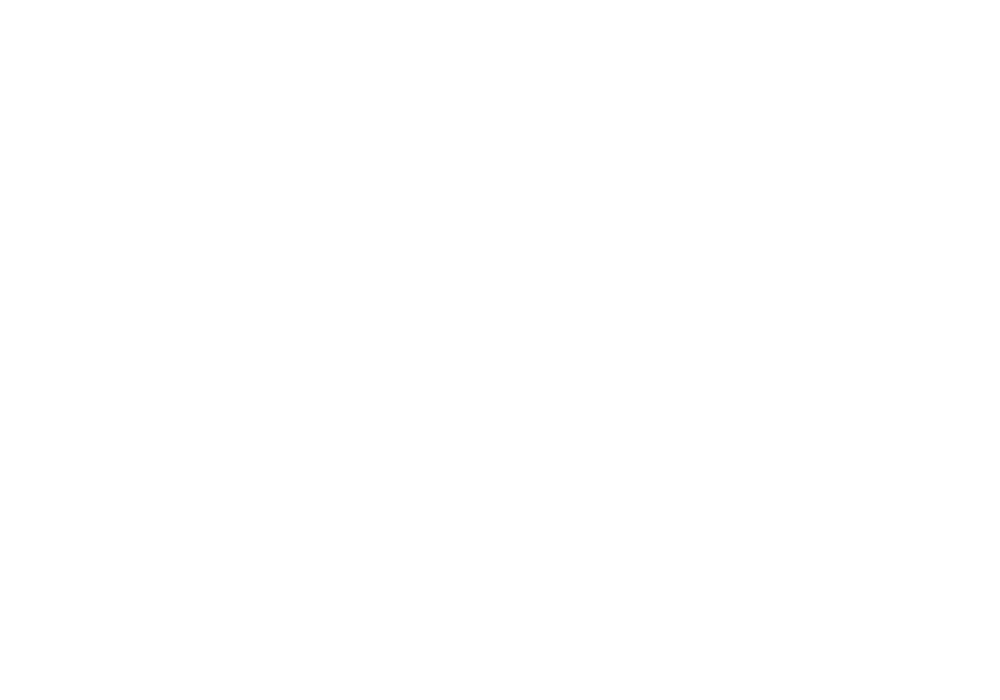

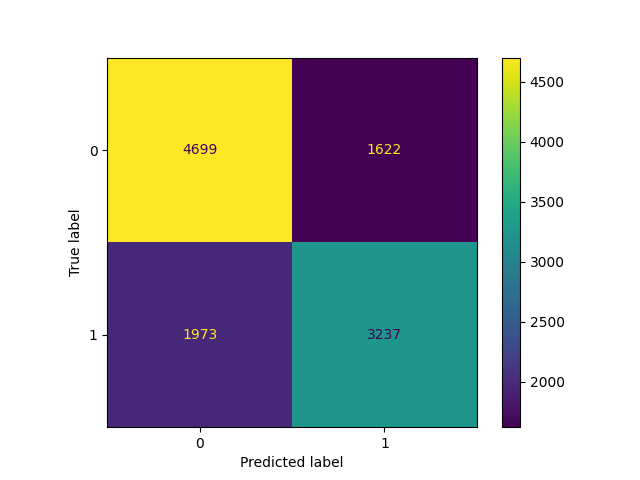

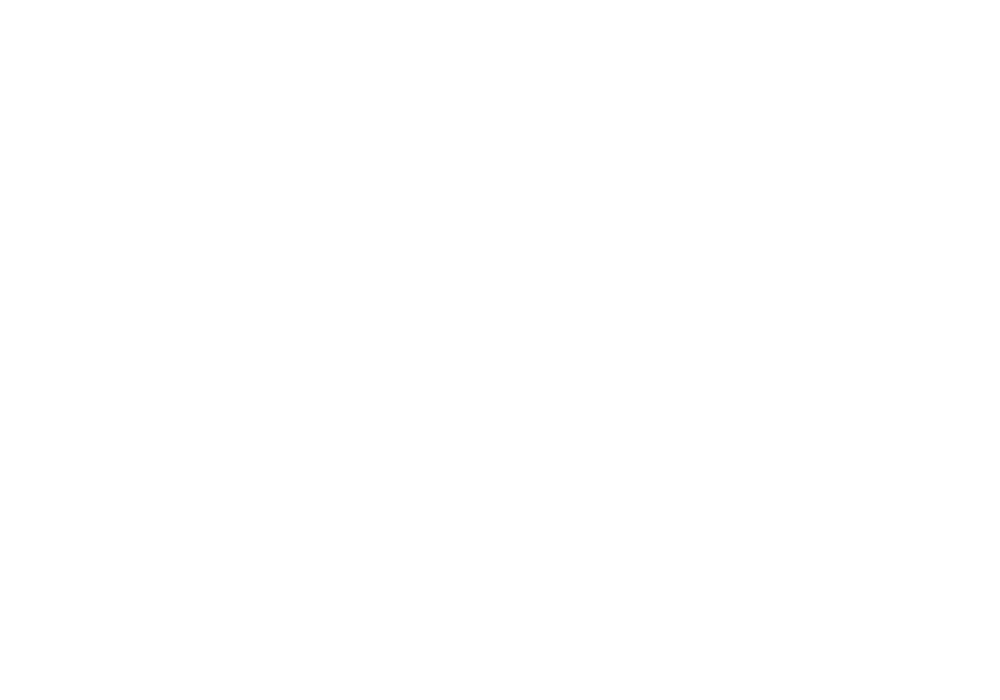

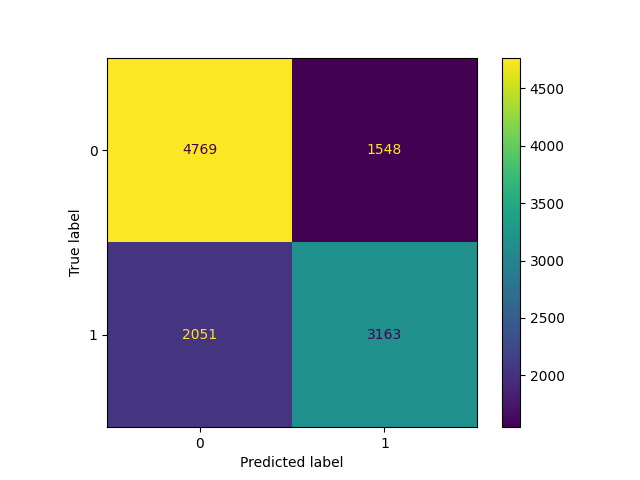

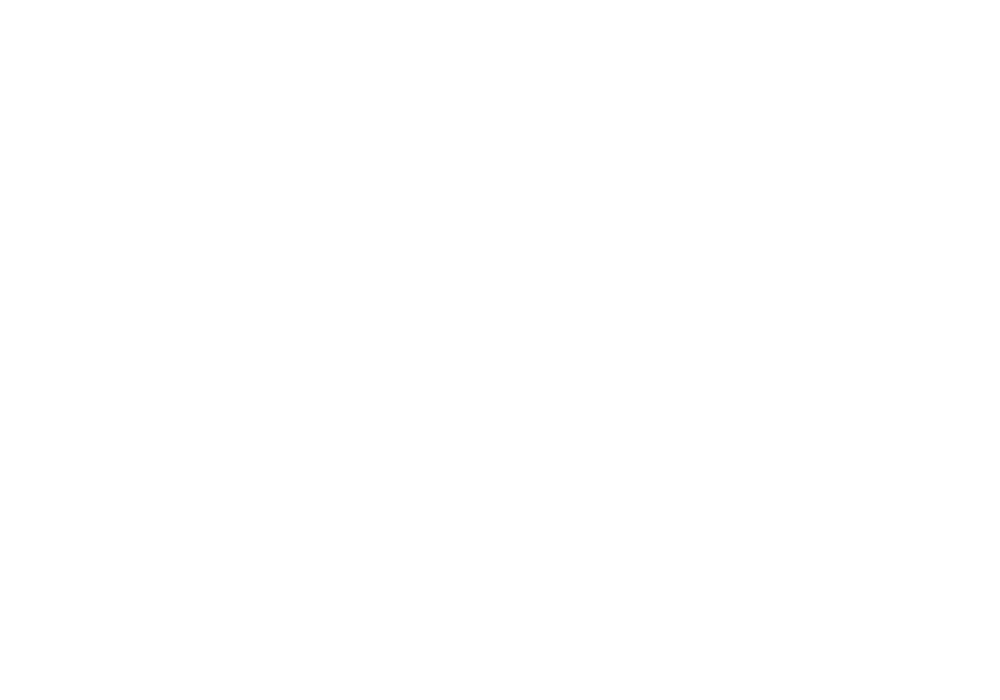

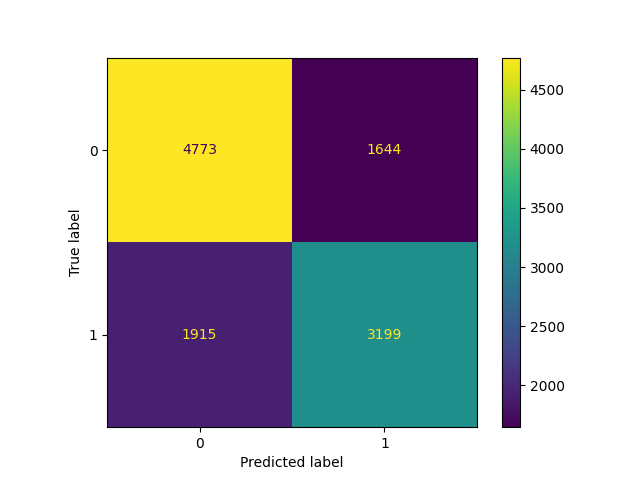

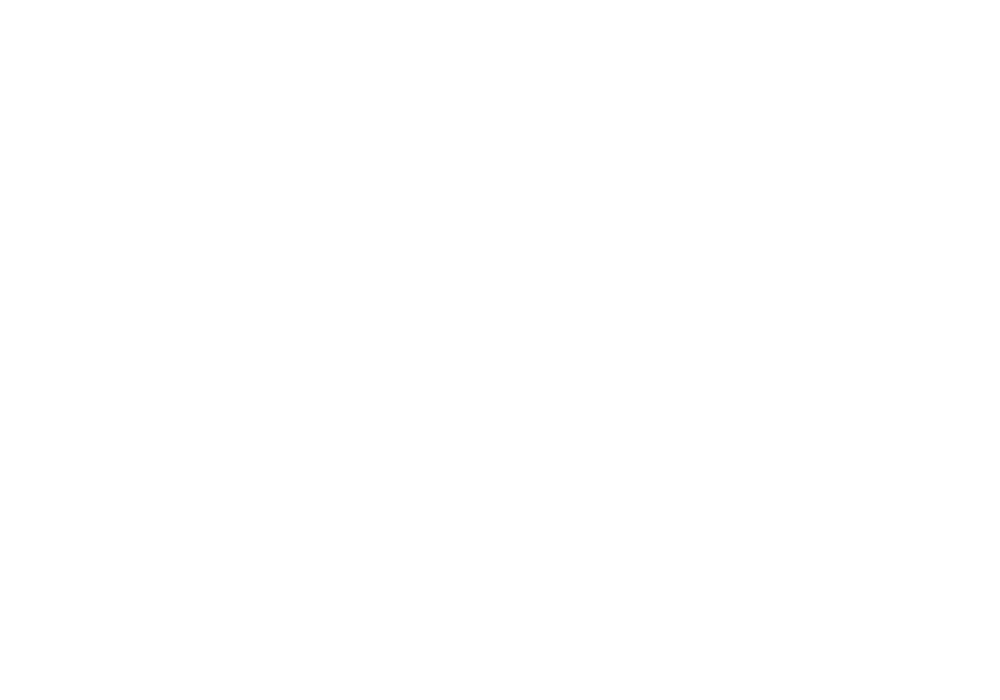

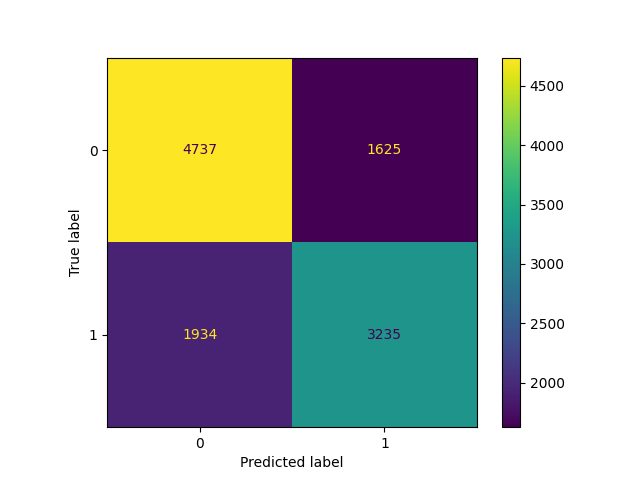

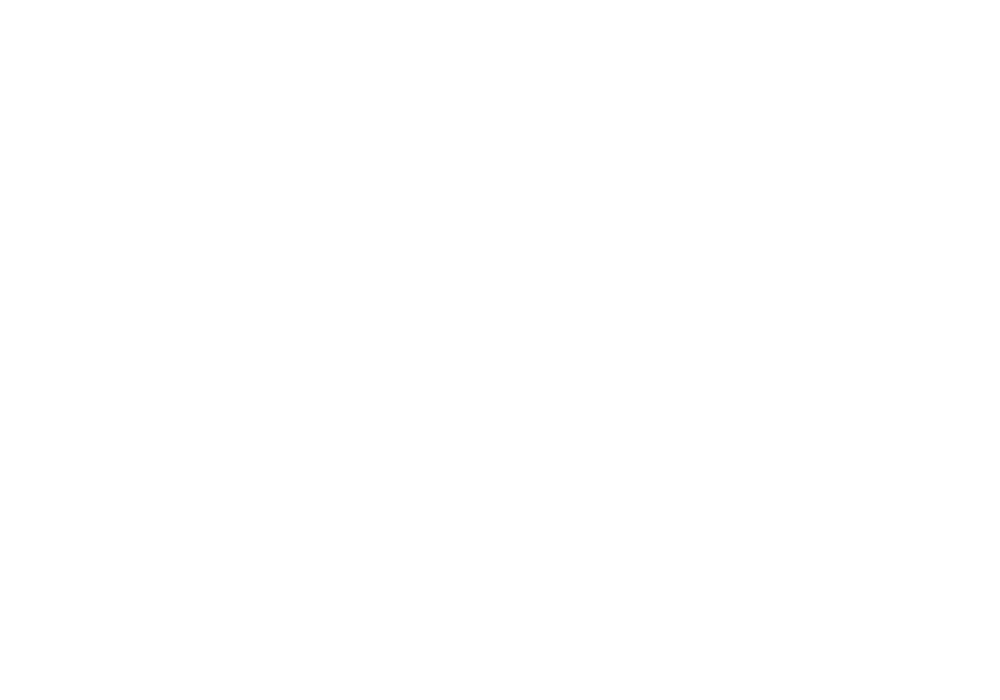

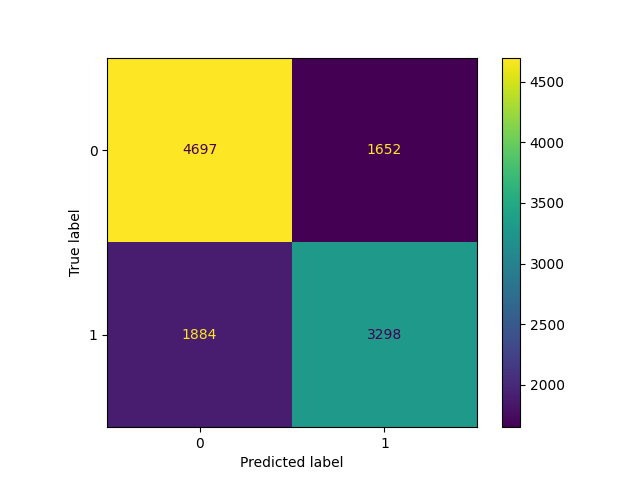

In [5]:
accuracy = [0.0 for x in range(1,(5+1))]
precision = [0.0 for x in range(1,(5+1))]
recall = [0.0 for x in range(1,(5+1))]
f1score = [0.0 for x in range(1,(5+1))]

for i in range(1,(5+1)):
    print('Data: ' + str(i))
    with open(directory+'\\..\\Data Cleaning\\train-'+str(i)+'.csv', 'r') as csvfile:
        dataset = list(csv.reader(csvfile))

    datasetLength = len(dataset)
    dataLabels = dataset[0]
    dataset = dataset[1:datasetLength]
    npDataset = np.array(dataset, dtype='float64')

    X_train = npDataset[:,0:(len(dataLabels)-1)]
    Y_train = npDataset[:,len(dataLabels)-1]

    with open(directory+'\\..\\Data Cleaning\\test-'+str(i)+'.csv', 'r') as csvfile:
        dataset = list(csv.reader(csvfile))

    datasetLength = len(dataset)
    dataLabels = dataset[0]
    dataset = dataset[1:datasetLength]
    npDataset = np.array(dataset, dtype='float64')

    X_test = npDataset[:,0:(len(dataLabels)-1)]
    Y_test = npDataset[:,len(dataLabels)-1]


    ### model

    KNNModel = KNeighborsClassifier(n_neighbors=5)
    KNNModel.fit(X_train, Y_train)

    Y_pred = KNNModel.predict(X_test)
    accuracy[i-1] = accuracy_score(Y_test, Y_pred)
    precision[i-1] = precision_score(Y_test, Y_pred, pos_label=float(1))
    recall[i-1] = recall_score(Y_test, Y_pred, pos_label=float(1))
    f1score[i-1] = f1_score(Y_test, Y_pred, pos_label=float(1))
    print("Accuracy:", accuracy[i-1])
    print("Precision:", precision[i-1])
    print("Recall:", recall[i-1])
    print("F1-Score:", f1score[i-1])

    # Create the confusion matrix
    cm = confusion_matrix(Y_test, Y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()

print("\nAverage:\n")
print("Accuracy:", np.mean(accuracy))
print("Precision:", np.mean(precision))
print("Recall:", np.mean(recall))
print("F1-Score:", np.mean(f1score))